# 1. Cálculo Simbólico de la Cinemática Directa

Se utilizará sympy para encontrar la matriz de transformación homogéneas de Denavit-Hartenberg (convención estándar)

In [1]:
import sympy as sp                # Biblioteca para el cálculo simbólico
import numpy as np


In [2]:
def sTdh(d, th, a, alpha):
    cth = sp.cos(th); sth = sp.sin(th)
    ca = sp.cos(alpha); sa = sp.sin(alpha)
    Tdh = sp.Matrix([[cth, -ca*sth,  sa*sth, a*cth],
                     [sth,  ca*cth, -sa*cth, a*sth],
                     [0,        sa,     ca,      d],
                     [0,         0,      0,      1]])
    return Tdh

In [3]:
# Variables simbólicas
q1, q2, q3, q4, q5, q6 = sp.symbols("q1 q2 q3 q4 q5 q6")
l1, l2, l3, l4 = sp.symbols("l1 l2 l3 l4")

# Transformaciones homogéneas
T01 = sTdh( 450,   sp.pi+q1, -150, sp.pi/2)
T12 = sTdh(   0, q2+sp.pi/2,  600,       0)
T23 = sTdh(   0,   q3+sp.pi, -200, sp.pi/2)
T34 = sTdh( 640,   q4+sp.pi,    0, sp.pi/2)
T45 = sTdh(   0,   q5+sp.pi,    0, sp.pi/2)
T56 = sTdh(   0,         q6,    0,       0)

# Transformación homogénea final
Tf = sp.simplify(T01*T12*T23*T34*T45*T56)

# Mostrar las transformaciones homogéneas (display funciona con IPython)
print("T01:"); display(T01)
print("T12:"); display(T12)
print("T23:"); display(T23)
print("T34:"); display(T34)
print("T45:"); display(T45)
print("T56:"); display(T56)
print("T06:"); display(Tf)

T01:


Matrix([
[-cos(q1), 0, -sin(q1), 150*cos(q1)],
[-sin(q1), 0,  cos(q1), 150*sin(q1)],
[       0, 1,        0,         450],
[       0, 0,        0,           1]])

T12:


Matrix([
[-sin(q2), -cos(q2), 0, -600*sin(q2)],
[ cos(q2), -sin(q2), 0,  600*cos(q2)],
[       0,        0, 1,            0],
[       0,        0, 0,            1]])

T23:


Matrix([
[-cos(q3), 0, -sin(q3), 200*cos(q3)],
[-sin(q3), 0,  cos(q3), 200*sin(q3)],
[       0, 1,        0,           0],
[       0, 0,        0,           1]])

T34:


Matrix([
[-cos(q4), 0, -sin(q4),   0],
[-sin(q4), 0,  cos(q4),   0],
[       0, 1,        0, 640],
[       0, 0,        0,   1]])

T45:


Matrix([
[-cos(q5), 0, -sin(q5), 0],
[-sin(q5), 0,  cos(q5), 0],
[       0, 1,        0, 0],
[       0, 0,        0, 1]])

T56:


Matrix([
[cos(q6), -sin(q6), 0, 0],
[sin(q6),  cos(q6), 0, 0],
[      0,        0, 1, 0],
[      0,        0, 0, 1]])

T06:


Matrix([
[-((sin(q1)*sin(q4) + sin(q2 + q3)*cos(q1)*cos(q4))*cos(q5) + sin(q5)*cos(q1)*cos(q2 + q3))*cos(q6) - (sin(q1)*cos(q4) - sin(q4)*sin(q2 + q3)*cos(q1))*sin(q6), ((sin(q1)*sin(q4) + sin(q2 + q3)*cos(q1)*cos(q4))*cos(q5) + sin(q5)*cos(q1)*cos(q2 + q3))*sin(q6) + (-sin(q1)*cos(q4) + sin(q4)*sin(q2 + q3)*cos(q1))*cos(q6), -(sin(q1)*sin(q4) + sin(q2 + q3)*cos(q1)*cos(q4))*sin(q5) + cos(q1)*cos(q5)*cos(q2 + q3), 10*(60*sin(q2) + 20*sin(q2 + q3) + 64*cos(q2 + q3) + 15)*cos(q1)],
[((-sin(q1)*sin(q2 + q3)*cos(q4) + sin(q4)*cos(q1))*cos(q5) - sin(q1)*sin(q5)*cos(q2 + q3))*cos(q6) + (sin(q1)*sin(q4)*sin(q2 + q3) + cos(q1)*cos(q4))*sin(q6),  ((sin(q1)*sin(q2 + q3)*cos(q4) - sin(q4)*cos(q1))*cos(q5) + sin(q1)*sin(q5)*cos(q2 + q3))*sin(q6) + (sin(q1)*sin(q4)*sin(q2 + q3) + cos(q1)*cos(q4))*cos(q6), -(sin(q1)*sin(q2 + q3)*cos(q4) - sin(q4)*cos(q1))*sin(q5) + sin(q1)*cos(q5)*cos(q2 + q3), 10*(60*sin(q2) + 20*sin(q2 + q3) + 64*cos(q2 + q3) + 15)*sin(q1)],
[                                      

In [4]:
# Valor cuando todos los ángulos son cero
print("T06 cuando q=(0,0,0,0,0,0):")
Tf.subs({q1:0., q2:0., q3:0., q4:0., q5:0., q6:0.})

T06 cuando q=(0,0,0,0,0,0):


Matrix([
[ 0, 0, 1,  790],
[ 0, 1, 0,    0],
[-1, 0, 0, 1250],
[ 0, 0, 0,    1]])

# 2. Cálculo Numérico de la Cinemática Directa

En este caso se utilizará numpy para el manejo de matrices y vectores

In [5]:
def Tdh(d, th, a, alpha):
    cth = np.cos(th);    sth = np.sin(th)
    ca = np.cos(alpha);  sa = np.sin(alpha)
    Tdh = np.array([[cth, -ca*sth,  sa*sth, a*cth],
                    [sth,  ca*cth, -sa*cth, a*sth],
                    [0,        sa,     ca,      d],
                    [0,         0,      0,      1]])
    return Tdh

In [6]:
# Cinemática directa del robot
def cdirecta_fanuc(q):
    """ Retorna los sistemas de referencia de cada eslabón con respecto a la base
    """
    # Transformaciones homogéneas de DH
    T01 = Tdh( 450,   np.pi+q[0], -150, np.pi/2);
    T12 = Tdh(   0, q[1]+np.pi/2,  600,       0);
    T23 = Tdh(   0,   q[2]+np.pi, -200, np.pi/2);
    T34 = Tdh( 640,   q[3]+np.pi,    0, np.pi/2);
    T45 = Tdh(   0,   q[4]+np.pi,    0, np.pi/2);
    T56 = Tdh(   0,         q[5],    0,       0);
    # Efector final con respecto a la base
    Tf = T01.dot(T12).dot(T23).dot(T34).dot(T45).dot(T56)
    return Tf

In [7]:
# Ejemplo de cálculo de la cinemática directa
q = np.array([0., 0., 0., 0., 0., 0.])

# Cinemática directa
Te = cdirecta_fanuc(np.deg2rad(q))   # Cinemática directa

# Mostrar el resultado
print("Efector final con respecto a la base cuando q1={}, q2={}, q3={}, q4={}, q5={}, q6={}".format(q[0], q[1], q[2],
                                                                                                    q[3], q[4], q[5]))

print(np.round(Te,4))

Efector final con respecto a la base cuando q1=0.0, q2=0.0, q3=0.0, q4=0.0, q5=0.0, q6=0.0
[[ 0.00e+00  0.00e+00  1.00e+00  7.90e+02]
 [-0.00e+00  1.00e+00 -0.00e+00 -0.00e+00]
 [-1.00e+00 -0.00e+00  0.00e+00  1.25e+03]
 [ 0.00e+00  0.00e+00  0.00e+00  1.00e+00]]


# # Gráfico del Robot FANUC 

Se utilizará una clase llamada SerialRobot, donde se definirá el robot utilizando los parámetros de Denavit-Hartenberg calculados. Usando esta clase se graficará el robot. Internamente, esta clase usa matplotlib para realizar el gráfico.

In [8]:
from serialrobot import *
%matplotlib inline

In [9]:
# Parámetros DH del robot
# d, th, a, alpha
L = [[ 0.450,   np.pi, -0.150, np.pi/2, 'r'],
     [     0, np.pi/2,  0.600,       0, 'r'],
     [     0,   np.pi, -0.200, np.pi/2, 'r'],
     [ 0.640,   np.pi,      0, np.pi/2, 'r'],
     [     0,   np.pi,      0, np.pi/2, 'r'],
     [     0,       0,      0,       0, 'r']]

# Creación del robot
fanuc = SerialRobot(L, name='fanuc-M10iA')

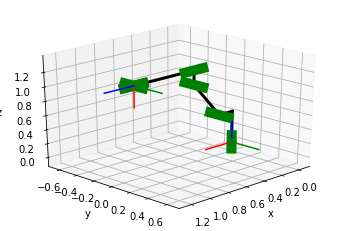

In [10]:
alims = [[-0.1,1.3],[-0.7,0.7],[-0.1, 1.4]]
fanuc.plot([0, 0.5, -0.5, 0., -0, 0], axlimits=alims, ascale=0.3, ee=False)